In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
from numpy.random import seed
seed(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [75]:
calhouse = pd.read_csv('cal30.csv')
calhouse.head()
X = calhouse[["medianIncome", "totalBedrooms"]]
y = calhouse["medianHouseValue"].values.reshape(-1, 1)



In [76]:
# Create Data
#X, y = sklearn.datasets.make_circles(noise=0.05, factor=.2, random_state=1)

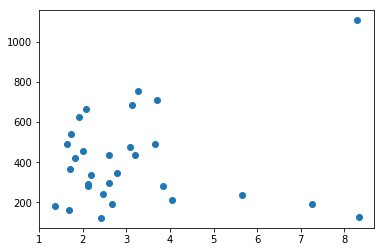

In [77]:
# Visualize Data
X1=X.values
#y=y.values

plt.scatter(X1[:, 0], X1[:, 1])

In [78]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [79]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [80]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [91]:
y_train

array([[132600],
       [113900],
       [ 99700],
       [342200],
       [352100],
       [107500],
       [299200],
       [158700],
       [191300],
       [241400],
       [105500],
       [358500],
       [152500],
       [452600],
       [140000],
       [132000],
       [108900],
       [261100],
       [226700],
       [213500],
       [241800],
       [269700]])

In [93]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical.shape

(22, 452601)

In [82]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=2))
model.add(Dense(units=2, activation='softmax'))

In [83]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 6)                 18        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 14        
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [87]:
X_train_scaled.shape


(22, 2)

In [90]:
y_train_categorical


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [95]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

ValueError: Error when checking target: expected dense_16 to have shape (2,) but got array with shape (452601,)

# Deep Learning
For this network, we simply add an additional hidden layer of 6 nodes

In [ ]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=2))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [ ]:
deep_model.summary()

In [ ]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

# Compare the models below

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

# In a nutshell...

![stack more layers](../Images/stack-more-layers.jpg)